In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tweetsDf = pd.read_csv('Tweets.csv')
summary = tweetsDf.describe(include='all')
print(summary)

            tweet_id airline_sentiment  airline_sentiment_confidence  \
count   1.464000e+04             14640                  14640.000000   
unique           NaN                 3                           NaN   
top              NaN          negative                           NaN   
freq             NaN              9178                           NaN   
mean    5.692184e+17               NaN                      0.900169   
std     7.791112e+14               NaN                      0.162830   
min     5.675883e+17               NaN                      0.335000   
25%     5.685592e+17               NaN                      0.692300   
50%     5.694779e+17               NaN                      1.000000   
75%     5.698905e+17               NaN                      1.000000   
max     5.703106e+17               NaN                      1.000000   

                negativereason  negativereason_confidence airline  \
count                     9178               10522.000000   14640 

In [3]:
tweetsDf.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
tweetsDf.head

<bound method NDFrame.head of                  tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason

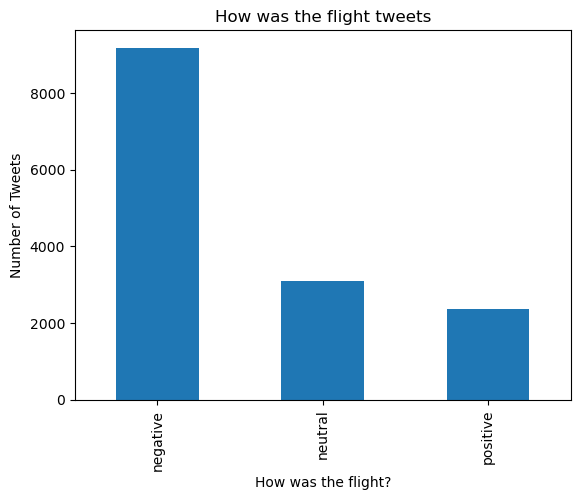

In [5]:
negativeReason = tweetsDf['airline_sentiment'].value_counts()
negativeReason.plot(kind='bar')

plt.title('How was the flight tweets')
plt.xlabel('How was the flight?')
plt.ylabel('Number of Tweets')
plt.show()

In [6]:
#positiveNneutral =  (tweetsDf[(tweetsDf['airline_sentiment'] == "postive") & (tweetsDf['airline_sentiment'] == "neutral")].index)
#tweetsDf.drop(positiveNneutral)

#airline_table = airline_table[airline_table['sentiment'] == 'negative']

tweetsDf=tweetsDf[tweetsDf['airline_sentiment']== 'negative']


<Figure size 2000x4000 with 0 Axes>

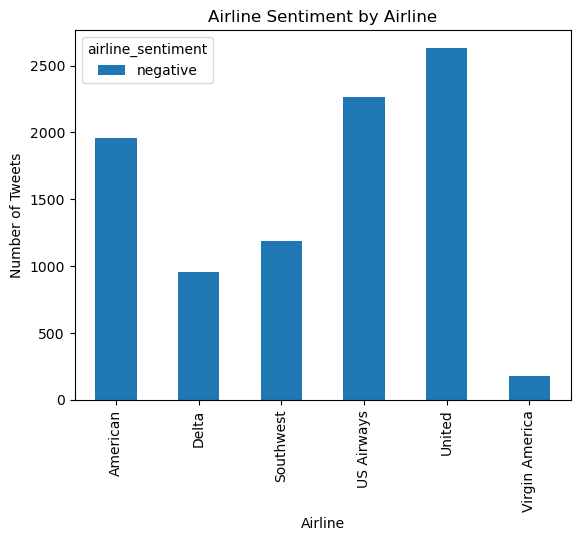

In [7]:
grouped = tweetsDf.groupby(['airline', 'airline_sentiment']).size().unstack()

fig = plt.figure(figsize = (20,40))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

<Figure size 500x500 with 0 Axes>

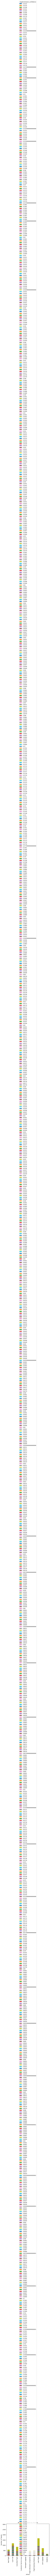

In [14]:
grouped = tweetsDf.groupby(['negativereason', 'negativereason_confidence']).size().unstack()

fig = plt.figure(figsize = (5,5))
grouped.plot(kind='bar', stacked=True)
plt.title('Airline Sentiment by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.show()

ChatGBT Code for HEATMAP PT1 

To make a graph showing each airline with each negative reason, you can use the seaborn library to create a heatmap. The heatmap will show the count of negative reasons for each airline and each negative reason.

First, we need to reshape the airline_table DataFrame so that each row represents an airline, a negative reason, and the count of occurrences. We can use the pivot_table() method to do this:



In [11]:
airline_negative_reasons = tweetsDf[tweetsDf['airline_sentiment'] == 'negative'].pivot_table(
    #index='airline',
    #columns='negativereason',
    index='negativereason',
    columns='airline',
    values='text',
    aggfunc='count'
)

ChatGBT Code for HEATMAP PT2

This code filters the DataFrame to keep only the rows where the 'sentiment' column is equal to 'negative', and then creates a pivot table with the 'airline' column as the index, the 'negativereason' column as the columns, and the 'text' column (which contains the review text) as the values. The aggfunc parameter is set to 'count' to count the number of occurrences.

This code sets the style of the plot to "darkgrid", sets the size of the figure to 12x8 inches, and creates a heatmap using sns.heatmap(). The data parameter specifies the DataFrame to use, and the annot, fmt, and cmap parameters specify the annotation, format, and color map for the heatmap, respectively.

We also set the title, x-label, and y-label using plt.title(), plt.xlabel(), and plt.ylabel(), respectively. Finally, we use plt.show() to display the plot.

This will create a heatmap showing each airline with the corresponding count of negative reasons. The color of each cell indicates the count of occurrences, with darker colors indicating higher counts. The x-axis shows the negative reasons, and the y-axis shows the airlines.

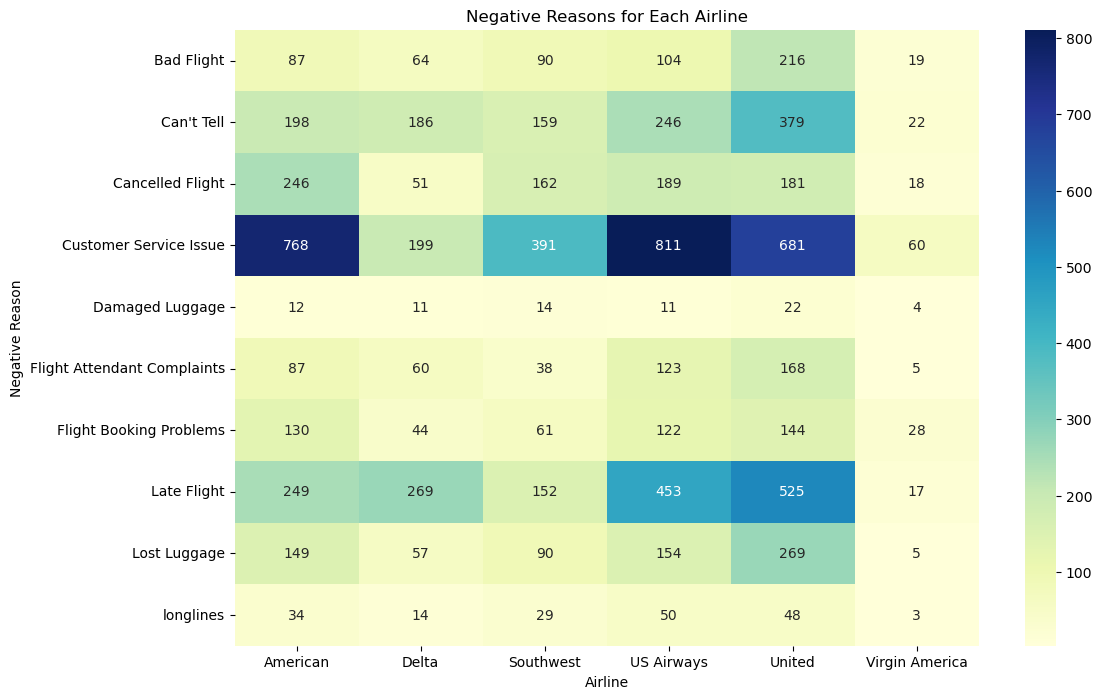

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(airline_negative_reasons, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Negative Reasons for Each Airline')
plt.xlabel('Airline')
plt.ylabel('Negative Reason')
plt.show()